## Домашнее задание "Теория вероятности. Непрерывные Случайные Величины"

### Уровень 0

Задание 1:

Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math

Нормальное распределение

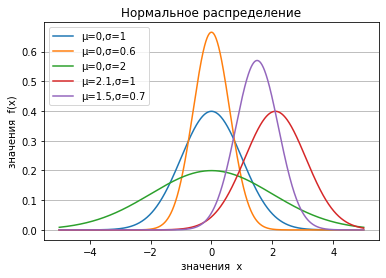

In [2]:
# зададим область определения функции
x = np.linspace(-5, 5, 1000)

# зададим параметры распределения (комментарии ниже)
p_norm = [(0, 1),(0, 0.6),(0, 2),(2.1, 1),(1.5, 0.7)]

# построим графики функции плотности вероятности
for pn in p_norm:
    plt.plot(x, sts.norm.pdf(x, loc=pn[0], scale=pn[1]), label=f'μ={pn[0]},σ={pn[1]}')

plt.title('Нормальное распределение')
plt.xlabel('значения  x')
plt.ylabel('значения  f(x)')
plt.legend()
plt.grid(axis='y')

Параметр loc определяет среднее значение (μ), scale - дисперсию (σ). Первый влияет на смещение (чем больше значение, тем больше сдвиг среднего значения по оси Х), второй - на масштаб: насколько вытянутым (σ < 1) или пологим (σ > 1) будет график функции (меньшим или большим будет разброс величин относительно среднего значения).

Экспоненциальное распределение

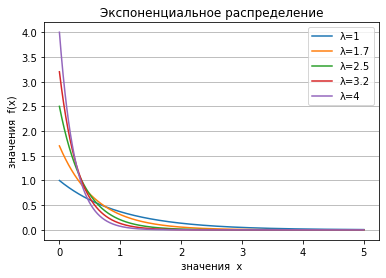

In [3]:
# зададим область определения функции
x = np.linspace(0, 5, 1000)

# зададим параметр распределения (комментарии ниже)
p_exp = [1, 1.7, 2.5, 3.2, 4]

# построим графики функции плотности вероятности
for pe in p_exp:
    plt.plot(x, sts.expon.pdf(x, scale=1/pe), label=f'λ={pe}')

plt.title('Экспоненциальное распределение')
plt.xlabel('значения  x')
plt.ylabel('значения  f(x)')
plt.legend()
plt.grid(axis='y')

Параметр λ - единственный параметр, определяющий свойства экспоненциального распределения. Влияет в целом на график функции: чем меньше значение λ, тем ниже начальное значение f(x) и больше пологость графика 
(scale=1/λ взято из документации).

Распределение Стьюдента

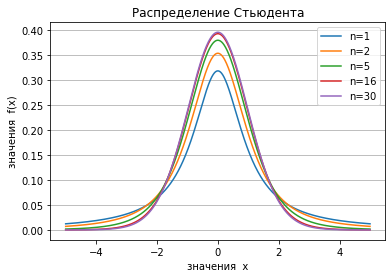

In [4]:
# зададим область определения функции
x = np.linspace(-5, 5, 1000)

# зададим параметр распределения (комментарии ниже)
p_t = [1, 2, 5, 16, 30]

# построим графики функции плотности вероятности
for pt in p_t:
    plt.plot(x, sts.t.pdf(x, df=pt), label=f'n={pt}')

plt.title('Распределение Стьюдента')
plt.xlabel('значения  x')
plt.ylabel('значения  f(x)')
plt.legend()
plt.grid(axis='y')

Параметр n - число степеней свободы - влияет на форму распределения Стьюдента: чем выше его значение, тем больше вытянут "колокол". При n > 15 график плотности вероятности практически не меняется.

### Уровень 1

Задание 2:

Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$ Найдите C, математическое ожидание $\xi$, а также вероятность попадания в отрезок $[3.5;7]$, т.е. P(3.5 < $\xi$ < 7).

Задано равномерное распределение непрерывной случайной величины. Значение функции плотности вероятности - константа, которая рассчитывается по формуле:

$\frac{1}{b - a}$, где $a$ начальное значение интервала, $b$ - конечное.

Математическое ожидание рассчитывается по формуле:  $\frac{a + b}{2}$  (так же определяется и медиана).

In [5]:
# зададим значения интервала, найдем С и математическое ожидание
a = 0
b = 5

print('Значение С равно ', 1/(b - a))
print()
print('Математическое ожидание равно ', (a + b)/2)

Значение С равно  0.2

Математическое ожидание равно  2.5


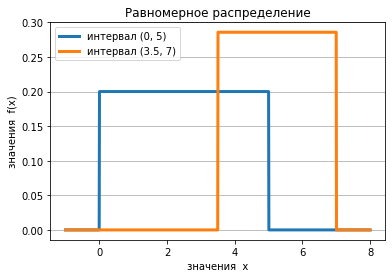

In [6]:
# построим графики функции плотности вероятности
x = np.linspace(-1, 8, 1000)

p_uniform = [(a, b), (3.5, 7)]

for pu in p_uniform:
    plt.plot(x, sts.uniform(pu[0], pu[1]-pu[0]).pdf(x), lw=3, label=f'интервал {pu}')

plt.title('Равномерное распределение')
plt.xlabel('значения  x')
plt.ylabel('значения  f(x)')
plt.legend()
plt.grid(axis='y')

Вероятность попадания в заданный отрезок соответствует площади прямоугольника (площади пересечения двух фигур), одна сторона которого равна $\Delta x$, вторая - значению функции плотности вероятности $f(x)$.

Таким образом, вероятность попадания в отрезок $[3.5,7]$ равна:

$\Delta x \cdot f(x) = (5 - 3.5) \cdot C = 1.5 \cdot 0.2 = 0.3$

Задание 3:

Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

В текущий момент цвет светофора может быть любым. Учитывая, что время работы каждого сигнала разное, количество информации (в битах) рассчитаем по формуле Шеннона: $-\sum_{i=1}^N p_i \cdot log_2p_i$

Во втором случае, когда время для каждого цвета одинаковое - 28 секунд, расчет сделаем по формуле Хартли: $log_2\frac{1}{p}$

In [7]:
# общее время работы светофора красный-желтый-зеленый (в первом случае)
54 + 4 + 28

86

In [8]:
# рассчет по формуле Шеннона

I_1 = -(54/86 * math.log2(54/86) + 4/86 * math.log2(4/86) + 28/86 * math.log2(28/86))
I_1

1.154522162441165

In [9]:
# рассчет по формуле Хартли (вероятность каждого сигнала равна 1/3)

I_2 = math.log2(1/(1/3))
I_2

1.584962500721156